<a href="https://colab.research.google.com/github/farhan-naqvi/thesparksfoundation/blob/main/Task-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation : Data Science & Business Analytics Tasks

# Prepared By : Syed Farhan Naqvi 

## Task - 1 : Prediction using Supervised ML

### Link to Dataset : http://bit.ly/w-data

In [ ]:
# importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
import warnings
warnings.filterwarnings('ignore') # used to suppress all the warnings

In [ ]:
# Loading the dataset 
df = pd.read_csv('student_scores.csv')

In [ ]:
# Exploring the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
print("Shape of the Dataset :",df.shape)

Shape of the Dataset : (25, 2)


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [ ]:
# Checking if there are any null values in the dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
print("There are {} students who got less than 35 marks (i.e) FAILED.".format(len(df.loc[df["Scores"]<35])))

There are 9 students who got less than 35 marks (i.e) FAILED.


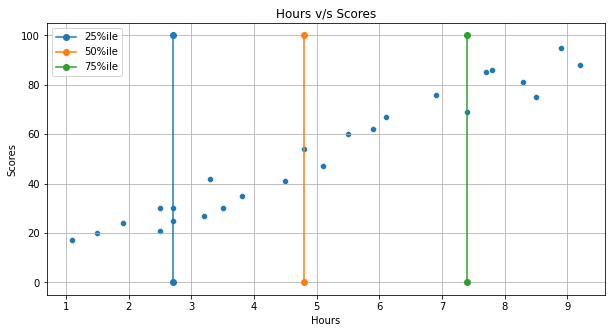

In [ ]:
# Plotting the x and y values using a scatterplot
plt.figure(figsize=(10,5))
sns.scatterplot(df['Hours'],df['Scores'])
plt.grid() # sets the grid isnide the figure
plt.plot((2.7,2.7),(0,100),marker="o",label="25%ile")
plt.plot((4.8,4.8),(0,100),marker="o",label="50%ile")
plt.plot((7.4,7.4),(0,100),marker="o",label="75%ile")
plt.title('Hours v/s Scores')
plt.legend()
plt.show()

In [ ]:
# Assigning the first column to X and the 2nd one to y
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1)

In [ ]:
# Splitting the Data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=0)

In [ ]:
#Creating an instance of LinearRegression
reg = LinearRegression()

# .fit() is used to find the optimal values of the slope and intercept, using the x and y values
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("Slope of the best fit line :",reg.coef_[0][0])
print("Intercept of the best fit line :",reg.intercept_[0])

Slope of the best fit line : 9.918306678342628
Intercept of the best fit line : 2.049688128927201


In [ ]:
# using the model to predict the test cases (will be using later to compare the predicted and actual values)
y_pred = reg.predict(X_test)

In [ ]:
print(y_pred)

[[16.92714815]
 [33.7882695 ]
 [75.44515755]
 [26.84545482]]


In [ ]:
print(y_test)

[[20]
 [27]
 [69]
 [30]]


In [ ]:
print(r2_score(y_test, y_pred)) 
print(mean_squared_error(y_test,y_pred,squared=False))

0.9267527498952749
5.1723841795395336


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
print("The score would be {:.2f}".format(reg.predict([[9.25]])[0][0])) # prediction

The score would be 93.79
